Causal News Corpus uses English sentences from Subtask 4 of the CASE Multilingual Protest News Detection.

* Github: https://github.com/emerging-welfare/case-2022-multilingual-event
* Paper: https://aclanthology.org/2021.case-1.11.pdf

Specifically, Subtask 4 works on Event Extraction, i.e. to extract event entity spans such as triggers and event arguments, from text. 

In this notebook, we add the Event information for our data, to provide more information for researchers to investigate further.

Note: We only do not release the Events for the test set because the Subtask 4 shared task is an on-going annually.

In [1]:
import os
import re
import pandas as pd

In [2]:
### Extract infos into List of Sentences & Tags
def get_slices(num_examples, num_sets=10):
    multiples = round(num_examples/num_sets)
    slice_list = [i*multiples for i in range(num_sets)]
    slice_list.append(num_examples)
    return slice_list
    

def get_original(txt_file, num_sets=10):
    sentences = []
    tags = []

    with open(txt_file, encoding='utf-8-sig') as file:
        for line in file:
            if line.strip() == '':
                # append
                sentences.append(curr_words)
                tags.append(curr_tags)
                curr_words = []
                curr_tags = []
            else:
                word, tag = line.strip().split('\t')
                if word == 'SAMPLE_START':                
                    curr_words = []
                    curr_tags = []
                elif word == '[SEP]':
                    # append
                    sentences.append(curr_words)
                    tags.append(curr_tags)
                    curr_words = []
                    curr_tags = []
                else:
                    word = word.replace(u'\ufeff', '').replace(r'[^\x00-\x7f]', '')
                    curr_words.append(word)
                    curr_tags.append(tag)

    sentences.append(curr_words)
    tags.append(curr_tags)

    print(len(sentences))
    print(sentences[0])
    print(tags[0])


    ### Split into Sets
    slice_list = get_slices(len(sentences), num_sets)
    print(slice_list)

    
    ### Format into DataFrame
    df = []
    for set_ in range(num_sets):
        start = slice_list[set_]
        end = slice_list[set_+1]
        for i in range(start,end):
            df.append(['train_{:02}.txt'.format(set_+1), sentences[i], tags[i]])      
    assert(len(df)==len(sentences))


    df = pd.DataFrame(df, columns=['set','text','tags'])
    return df


# Get "en-train.txt" from CASE organizers
df = get_original(txt_file = r"D:\61 Challenges\2022_CASE_\FLAT_Annotation\data\en-train.txt", num_sets=10)
df

3248
['The', 'State', 'alleged', 'they', 'hacked', 'Sabata', 'Petros', 'Chale', ',', '39', ',', 'to', 'death', 'in', 'Marikana', 'West', ',', 'on', 'December', '8', ',', '2016', ',', 'allegedly', 'over', 'the', 'allocation', 'of', 'low', 'cost', '(', 'RDP', ')', 'houses', 'at', 'Marikana', 'West', 'Extension', '2', '.']
['O', 'O', 'O', 'O', 'B-trigger', 'B-target', 'I-target', 'I-target', 'O', 'O', 'O', 'O', 'O', 'O', 'B-place', 'I-place', 'O', 'B-etime', 'I-etime', 'I-etime', 'I-etime', 'I-etime', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-place', 'I-place', 'B-fname', 'I-fname', 'O']
[0, 325, 650, 975, 1300, 1625, 1950, 2275, 2600, 2925, 3248]


,set,text,tags
0,train_01.txt,"[The, State, alleged, they, hacked, Sabata, Pe...","[O, O, O, O, B-trigger, B-target, I-target, I-..."
1,train_01.txt,"[Chale, was, allegedly, chased, by, a, group, ...","[B-target, O, O, B-trigger, O, O, B-participan..."
2,train_01.txt,"[His, attackers, allegedly, drank, his, blood, .]","[O, B-participant, O, B-trigger, I-trigger, I-..."
3,train_01.txt,"[Tip, asked, Mathunjwa, why, he, had, not, ``,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-trig..."
4,train_01.txt,"[``, It, the, protest, was, something, which, ...","[O, O, O, B-trigger, O, O, O, O, O, O, O, O, O]"
...,...,...,...
3243,train_10.txt,"[Police, spokesman, ,, Lieutenant, Colonel, Th...","[O, O, O, O, O, O, O, O, O, O, O, B-etime, O, ..."
3244,train_10.txt,"[National, Freedom, Party, spokesman, ,, Sabel...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3245,train_10.txt,"[He, described, the, shooting, as, ``, evil, '...","[O, O, O, B-trigger, O, O, O, O, O]"
3246,train_10.txt,"[On, Sunday, ,, three, explosions, in, the, so...","[B-etime, I-etime, O, O, B-trigger, O, O, O, O..."


In [3]:
### Run for "train_subtask1" and "dev_subtask1"
main_df = pd.read_csv("../data/V2/train_subtask1.csv", encoding='utf-8-sig')
main_df['text'] = main_df['text'].apply(lambda x: x.replace(u'\ufeff', '').replace(r'[^\x00-\x7f]', ''))
main_df['set'] = main_df['index'].apply(lambda x: '_'.join(x.split('_')[0:3]) if ('A' in x) or ('B' in x) else '_'.join(x.split('_')[0:2])) #.str.split('_',expand=True)
main_df['sub'] = main_df['index'].apply(lambda x: x.split('_')[-2]).astype(int)
main_df['eg'] = main_df['index'].apply(lambda x: x.split('_')[-1]).astype(int)
main_df = main_df.sort_values(by=['set','sub']).reset_index(drop=True)
main_df

,index,text,label,set,sub,eg
0,train_01_0_1437,The State alleged they hacked Sabata Petros Ch...,1,train_01,0,1437
1,train_01_1_3212,Chale was allegedly chased by a group of about...,0,train_01,1,3212
2,train_01_2_3319,His attackers allegedly drank his blood .,0,train_01,2,3319
3,train_01_3_1008,Tip asked Mathunjwa why he had not `` explicit...,0,train_01,3,1008
4,train_01_4_2655,`` It the protest was something which happened...,0,train_01,4,2655
...,...,...,...,...,...,...
3067,train_09_B_157_2377,"The first was shot , the second beaten to deat...",0,train_09_B,157,2377
3068,train_09_B_158_2503,Soon after reports of Mr. Mony 's statement st...,0,train_09_B,158,2503
3069,train_09_B_159_2947,"Ancheri Baby was shot dead on November 13 , 19...",0,train_09_B,159,2947
3070,train_09_B_160_479,Mullanchira Mathai was beaten to death on Janu...,1,train_09_B,160,479


In [4]:
tags = []
for i,row in main_df.iterrows():
    row_text = re.sub(r'[^\x00-\x7f]',r'', row.text).strip()
    
    ### filter to rows with same 'set' and 'subset', e.g. "train_01" and "120"
    t_set = '_'.join(str(row['set']).split('_')[0:2]) # drop "_A", "_B"
    sent_id = int(row['sub'])
    if 'B' in str(row['set']):
        sent_id+=163 # hard coded, train_09_A + train_09_B== train_09! (in order)
    focus_row = df[df['set']=='{}.txt'.format(t_set)].iloc[sent_id]
    curr_text = ' '.join(focus_row['text'])
    curr_text = re.sub(r'[^\x00-\x7f]',r'', curr_text)
    curr_tag = focus_row['tags']
    ### check if text tallies exactly or not
    if row_text == curr_text:
        ### if exact match, we take tags as is
        tags.append(curr_tag)
    elif row_text in curr_text:
        ### if NOT exact match, we adjust/remove tokens
        _words = []
        _tags = []
        word_pointer = 0
        keep_words = row_text.split(' ')
        for j,word in enumerate(curr_text.split(' ')):
            if len(_words)==len(keep_words):
                break
            if word==keep_words[word_pointer]:
                _words.append(word)
                _tags.append(curr_tag[j])
                word_pointer+=1
        assert(_words==keep_words)
        tags.append(_tags)
    else:
        ### this should not occur
        
        raise ValueError("Not Implemented!")
        
main_df['events'] = tags
main_df = main_df[['index','text','label','events']]
main_df.head()

,index,text,label,events
0,train_01_0_1437,The State alleged they hacked Sabata Petros Ch...,1,"[O, O, O, O, B-trigger, B-target, I-target, I-..."
1,train_01_1_3212,Chale was allegedly chased by a group of about...,0,"[B-target, O, O, B-trigger, O, O, B-participan..."
2,train_01_2_3319,His attackers allegedly drank his blood .,0,"[O, B-participant, O, B-trigger, I-trigger, I-..."
3,train_01_3_1008,Tip asked Mathunjwa why he had not `` explicit...,0,"[O, O, O, O, O, O, O, O, O, O, O, O, O, B-trig..."
4,train_01_4_2655,`` It the protest was something which happened...,0,"[O, O, O, B-trigger, O, O, O, O, O, O, O, O, O]"


In [5]:
main_df.to_csv(
    "../data/V2/train_subtask1_wevents.csv", 
    encoding='utf-8-sig', index=False
)

### Analyze Event Information x Causal Label
Check if there is a correlation between occurence of some events and causal labels

In [6]:
from collections import Counter

events_dict = dict(Counter([item for sublist in main_df['events'] for item in sublist]))
events = set([i.split('-')[-1] for i in events_dict.keys()])
events

{'O',
 'etime',
 'fname',
 'organizer',
 'participant',
 'place',
 'target',
 'trigger'}

In [7]:
events_dict

{'O': 71752,
 'B-trigger': 4135,
 'B-target': 1309,
 'I-target': 1032,
 'B-place': 1459,
 'I-place': 262,
 'B-etime': 1096,
 'I-etime': 1437,
 'B-fname': 1089,
 'I-fname': 2398,
 'B-participant': 2354,
 'I-trigger': 1273,
 'I-participant': 684,
 'B-organizer': 1126,
 'I-organizer': 1335}

In [8]:
event_counts = []
for tags in main_df['events']:
    _event_counts = []
    for e in events:
        _event_counts.append(tags.count(f'B-{e}'))
    event_counts.append(_event_counts)

events_df = pd.DataFrame(event_counts, columns=events)
events_df['total'] = events_df.sum(axis=1)
events_df

,O,target,place,etime,organizer,participant,trigger,fname,total
0,0,1,2,1,0,0,1,1,6
1,0,1,0,0,0,2,2,0,5
2,0,0,0,0,0,1,1,0,2
3,0,0,0,0,0,1,2,0,3
4,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
3067,0,0,0,0,0,0,3,0,3
3068,0,4,0,1,0,0,1,0,6
3069,0,1,0,1,0,0,1,0,3
3070,0,1,0,1,1,1,1,0,5


In [9]:
events_df.sum(axis=0)

O                  0
target          1309
place           1459
etime           1096
organizer       1126
participant     2354
trigger         4135
fname           1089
total          12568
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

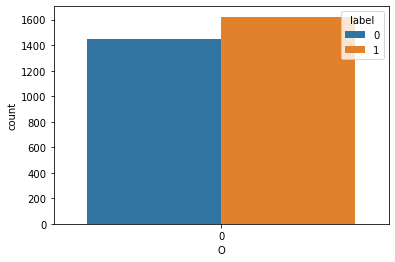

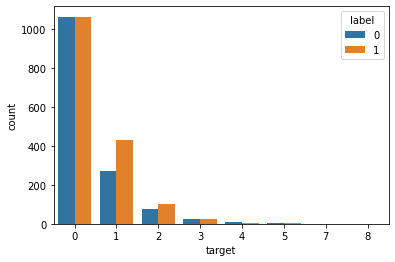

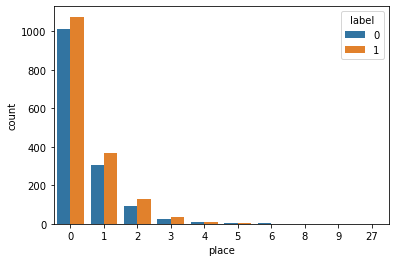

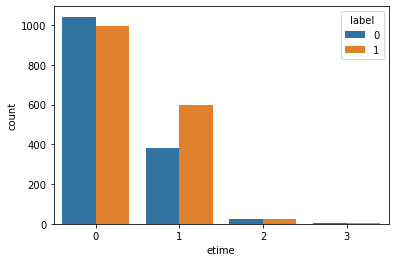

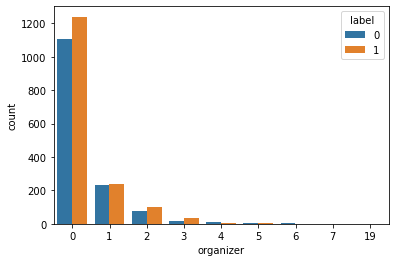

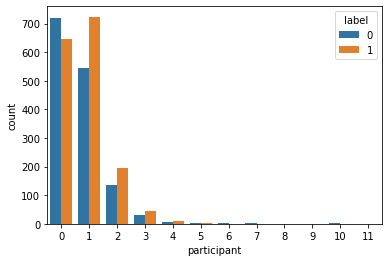

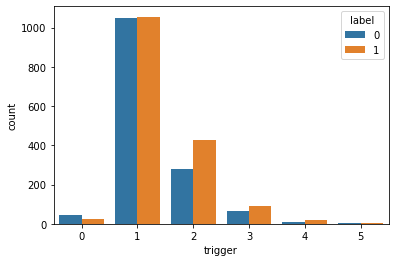

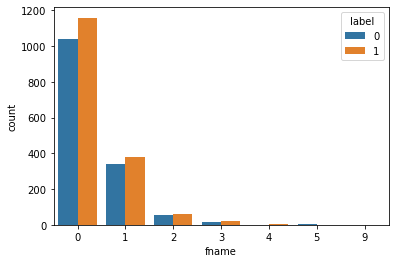

In [11]:
for e in list(events):
    sns.countplot(x=events_df[e], hue=main_df['label'])
    plt.show()

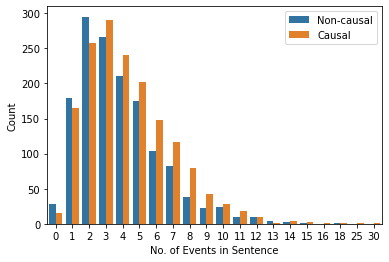

In [13]:
ax = sns.countplot(x=events_df['total'], hue=main_df['label'])
ax.set(xlabel='No. of Events in Sentence', ylabel='Count')
plt.legend(labels=['Non-causal', 'Causal'])
plt.show()